In [2]:
# Importer les bibliothèques nécessaires
import numpy as np
from keras.applications import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import os
from glob import glob
import re
import shutil
import cv2

In [3]:
# Charger ResNet50 sans la couche de classification
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

In [4]:
def extract_features(img, model):
    # Redimensionner l'image à 224x224 pixels
    img = img.resize((224, 224))
    # Convertir l'image en un tableau numpy
    x = image.img_to_array(img)
    # Ajouter une dimension (pour représenter le batch de 1 image)
    x = np.expand_dims(x, axis=0)
    # Prétraiter l'image pour ResNet
    x = preprocess_input(x)
    # Passer l'image dans le modèle pour extraire les features
    features = model.predict(x)
    # Aplatir le vecteur de sortie (c'est déjà un vecteur de 2048, donc facultatif ici)
    return features.flatten()


On réalise 2 fonctions de découpage d'images, une pour les caméras du haut où le ciel prédomine et l'autre pour les caméras du bas où la mer prédomine. Le but est, pour les 2 groupes d'images, d'isoler un rectangle de ciel (resp de mer) pour que le clustering se fasse exclusivement en fonction de l'état du ciel (resp de la mer). Le but sera de mettre ces fonctions dans un fichier .py réalisé par Timothée pour pouvoir les appeler

In [5]:
from PIL import Image

#Fonction qui découpe un rectangle dans le ciel

from PIL import Image

def decoupe_rectangle_ciel(image):
    # Dimensions du rectangle à découper
    crop_width = 1561
    crop_height = 780

    # Calculer les coordonnées du rectangle à découper
    width, height = image.size
    left = (width - crop_width) / 2
    top = 0
    right = left + crop_width
    bottom = top + crop_height

    # Découper l'image
    cropped_image = image.crop((left, top, right, bottom))

    return cropped_image



In [6]:
from PIL import Image

#Fonction qui découpe un rectangle dans la mer

def decoupe_rectangle_mer(image):
    # Dimensions du carré à découper
    crop_size = 820
    offset = 126

    # Calculer les coordonnées du carré à découper au centre de l'image avec décalage à droite
    width, height = image.size
    left = (width - crop_size) / 2 + offset
    top = (height - crop_size) / 2
    right = left + crop_size
    bottom = top + crop_size

    # Découper l'image
    cropped_image = image.crop((left, top, right, bottom))

    return cropped_image




 # Adapatation de l'algorithme initial de resNet 50

Il s'agit ici de reprendre l'algorithme initiallement utilisé pour extraire les features des images grâce à ResNet50. Cependant, on ajoute une modification, en fonction du titre de l'image (qui contient le numero de frame) on classe l'image dans une des 2 listes photos_ciel et photos_mer. On peut ensuite appliquer les 2 fonctions ci-dessus pour extraire un rectangle de l'image pour chacune des 2 listes en créant ainsi 2 nouvelles listes: extraits_photos_ciel et extraits_photos_mer. On applique ResNet50 à ces 2 listes

In [7]:
import glob
import numpy as np
import os
from PIL import Image

# Initialiser les listes pour stocker les photos
photos_ciel = []
photos_mer = []

# Listes pour les images découpées
photos_ciel_découpés = []
photos_mer_découpés = []

# Listes pour stocker les features
features_ciel_list = []
features_mer_list = []

# Chemin vers le dossier d'images
dossier_images = "../DATASET_SENSEA/images"
print(os.path.exists(dossier_images))  # Vérifie si le chemin existe


True


# !! à éxécuter pour classer les images dans les deux dossiers différents si déjà fait pas besoin !!

In [8]:
"""

# Chemin vers les sous-dossiers photos_ciel et photos_mer
photos_ciel_path = os.path.join(dossier_images, "photos_ciel")
photos_mer_path = os.path.join(dossier_images, "photos_mer")

# Créer les dossiers s'ils n'existent pas déjà
os.makedirs(photos_ciel_path, exist_ok=True)
os.makedirs(photos_mer_path, exist_ok=True)

# Liste de tous les fichiers dans le dossier images
fichiers = [f for f in os.listdir(dossier_images) if f.endswith(".jpg")]

# Expression régulière pour extraire le numéro avant 'frame'
pattern = re.compile(r"-(\d+)_frame")

# Trier les fichiers
for fichier in fichiers:
    # Trouver le chemin complet du fichier
    chemin_complet = os.path.join(dossier_images, fichier)
    
    # Extraire le numéro avant 'frame'
    match = pattern.search(fichier)
    if match:
        numero_frame = int(match.group(1))
        
        # Vérifier si le numéro est pair ou impair
        if numero_frame % 2 == 0:
            # Déplacer vers photos_ciel (nombres pairs)
            shutil.move(chemin_complet, os.path.join(photos_ciel_path, fichier))
            print(f"Déplacé dans photos_ciel : {fichier}")
        else:
            # Déplacer vers photos_mer (nombres impairs)
            shutil.move(chemin_complet, os.path.join(photos_mer_path, fichier))
            print(f"Déplacé dans photos_mer : {fichier}")
    else:
        print(f"Nom de fichier non conforme : {fichier}")
        
"""

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\timot\AppData\Local\Temp\ipykernel_2904\2897102473.py:1: SyntaxWarning: invalid escape sequence '\d'
  """


'\n\n# Chemin vers les sous-dossiers photos_ciel et photos_mer\nphotos_ciel_path = os.path.join(dossier_images, "photos_ciel")\nphotos_mer_path = os.path.join(dossier_images, "photos_mer")\n\n# Créer les dossiers s\'ils n\'existent pas déjà\nos.makedirs(photos_ciel_path, exist_ok=True)\nos.makedirs(photos_mer_path, exist_ok=True)\n\n# Liste de tous les fichiers dans le dossier images\nfichiers = [f for f in os.listdir(dossier_images) if f.endswith(".jpg")]\n\n# Expression régulière pour extraire le numéro avant \'frame\'\npattern = re.compile(r"-(\\d+)_frame")\n\n# Trier les fichiers\nfor fichier in fichiers:\n    # Trouver le chemin complet du fichier\n    chemin_complet = os.path.join(dossier_images, fichier)\n    \n    # Extraire le numéro avant \'frame\'\n    match = pattern.search(fichier)\n    if match:\n        numero_frame = int(match.group(1))\n        \n        # Vérifier si le numéro est pair ou impair\n        if numero_frame % 2 == 0:\n            # Déplacer vers photos_ci

In [ ]:
# Chemin vers les sous-dossiers photos_ciel et photos_mer
photos_ciel_path = os.path.join(dossier_images, "photos_ciel")
photos_mer_path = os.path.join(dossier_images, "photos_mer")

# Paramètres pour réduire le nombre d'images traitées
N = 20  # Traiter une image sur N pour réduire le temps d'exécution

# Liste des images dans chaque dossier
photos_ciel = glob.glob(os.path.join(photos_ciel_path, "*.jpg"))
photos_mer = glob.glob(os.path.join(photos_mer_path, "*.jpg"))

# Afficher la taille des listes photos_ciel et photos_mer
print(f"Nombre d'images dans photos_ciel: {len(photos_ciel)}")
print(f"Nombre d'images dans photos_mer: {len(photos_mer)}")

# Paramétrer un filtrage pour limiter les images traitées (1 image sur N)
photos_ciel_filtered = photos_ciel[::N]
photos_mer_filtered = photos_mer[::N]

# Afficher la taille après filtrage
print(f"Nombre d'images filtrées pour photos_ciel: {len(photos_ciel_filtered)}")
print(f"Nombre d'images filtrées pour photos_mer: {len(photos_mer_filtered)}")

# Découper les images du ciel
for img_path in photos_ciel_filtered:
    with Image.open(img_path) as img:
        extrait_ciel = decoupe_rectangle_ciel(img)  
        photos_ciel_découpés.append(extrait_ciel)

# Afficher la taille de la liste des images découpées pour le ciel
print(f"Nombre d'images découpées pour photos_ciel: {len(photos_ciel_découpés)}")

# Découper les images de la mer
for img_path in photos_mer_filtered:
    with Image.open(img_path) as img:
        extrait_mer = decoupe_rectangle_mer(img)  
        photos_mer_découpés.append(extrait_mer)

# Afficher la taille de la liste des images découpées pour la mer
print(f"Nombre d'images découpées pour photos_mer: {len(photos_mer_découpés)}")

# Extraire les features des images découpées pour le ciel
for img in photos_ciel_découpés:
    features_ciel = extract_features(img, model)
    features_ciel_list.append(features_ciel)  

# Afficher la taille de la liste des features pour le ciel
print(f"Nombre de features extraites pour photos_ciel: {len(features_ciel_list)}")

# Extraire les features des images découpées pour la mer
for img in photos_mer_découpés:
    features_mer = extract_features(img, model)  
    features_mer_list.append(features_mer)

# Afficher la taille de la liste des features pour la mer
print(f"Nombre de features extraites pour photos_mer: {len(features_mer_list)}")

# Convertir les listes de features en tableaux numpy
features_ciel_array = np.array(features_ciel_list)
features_mer_array = np.array(features_mer_list)

# Afficher la forme des tableaux numpy
print(f"Shape of features_ciel_array: {features_ciel_array.shape}")
print(f"Shape of features_mer_array: {features_mer_array.shape}")


Nombre d'images dans photos_ciel: 10834
Nombre d'images dans photos_mer: 9771
Nombre d'images filtrées pour photos_ciel: 109
Nombre d'images filtrées pour photos_mer: 98
Nombre d'images découpées pour photos_ciel: 109
Nombre d'images découpées pour photos_mer: 98
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━

In [ ]:
from sklearn.decomposition import PCA

# Supposons que `features_array` soit le tableau de features de 2048 dimensions (chaque ligne est un vecteur de features pour une image)
# Vérifions sa taille pour être sûr
print(features_ciel_array.shape)  # Par exemple, (num_images, 2048)
print(features_mer_array.shape)  

# On applique PCA pour réduire à un nombre de dimensions réduit, ici 50 pour l'exemple
pca = PCA(n_components=50)
reduced_features_ciel = pca.fit_transform(features_ciel_array)
reduced_features_mer = pca.fit_transform(features_mer_array)



# Affichage des dimensions après réduction
print(reduced_features_mer.shape)  # Par exemple, (num_images, 50)
print(reduced_features_ciel.shape) 

(109, 2048)
(98, 2048)
<class 'numpy.float32'>
(98, 50)
(109, 50)


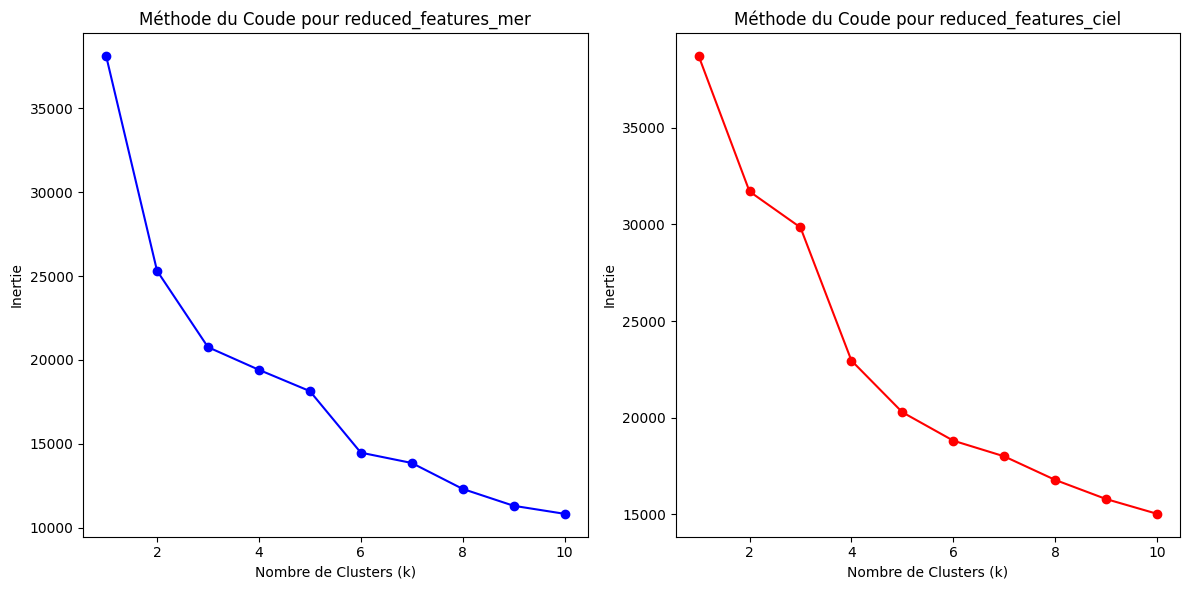

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Liste pour stocker les inerties
inertias_mer = []
inertias_ciel = []

# Tester K-means pour différents nombres de clusters (de 1 à 10)
for k in range(1, 11):
    # Appliquer KMeans sur reduced_features_mer
    kmeans_mer = KMeans(n_clusters=k, random_state=0)
    kmeans_mer.fit(reduced_features_mer)  # Utilisez reduced_features_mer pour la mer
    inertias_mer.append(kmeans_mer.inertia_)

    # Appliquer KMeans sur reduced_features_ciel
    kmeans_ciel = KMeans(n_clusters=k, random_state=0)
    kmeans_ciel.fit(reduced_features_ciel)  # Utilisez reduced_features_ciel pour le ciel
    inertias_ciel.append(kmeans_ciel.inertia_)

# Tracer le graphique de la méthode du coude pour reduced_features_mer
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Premier graphique
plt.plot(range(1, 11), inertias_mer, marker='o', color='b')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour reduced_features_mer')

# Tracer le graphique de la méthode du coude pour reduced_features_ciel
plt.subplot(1, 2, 2)  # Deuxième graphique
plt.plot(range(1, 11), inertias_ciel, marker='o', color='r')
plt.xlabel('Nombre de Clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour reduced_features_ciel')

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [12]:
from sklearn.cluster import KMeans

# Choisir le nombre optimal de clusters (exemple avec k=5)
k_optimal = 5

# Appliquer K-means pour reduced_features_mer
kmeans_mer = KMeans(n_clusters=k_optimal, random_state=0)
labels_kmeans_mer = kmeans_mer.fit_predict(reduced_features_mer)  # Appliquer K-Means sur reduced_features_mer

# Afficher les étiquettes des clusters pour chaque image de reduced_features_mer
print("Étiquettes des clusters pour reduced_features_mer:")
print(labels_kmeans_mer)

# Appliquer K-means pour reduced_features_ciel
kmeans_ciel = KMeans(n_clusters=k_optimal, random_state=0)
labels_kmeans_ciel = kmeans_ciel.fit_predict(reduced_features_ciel)  # Appliquer K-Means sur reduced_features_ciel

# Afficher les étiquettes des clusters pour chaque image de reduced_features_ciel
print("Étiquettes des clusters pour reduced_features_ciel:")
print(labels_kmeans_ciel)


Étiquettes des clusters pour reduced_features_mer:
[1 1 1 2 2 2 1 1 0 0 1 1 4 4 4 1 1 1 2 2 0 0 0 0 2 2 1 1 2 2 2 2 2 4 4 4 0
 0 0 4 4 4 4 4 4 4 2 2 2 2 2 2 2 0 0 0 1 2 2 2 1 4 4 4 1 1 1 4 4 4 4 2 2 2
 3 3 3 4 4 4 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1]
Étiquettes des clusters pour reduced_features_ciel:
[0 0 4 4 4 0 0 4 3 3 1 3 1 1 1 3 1 1 1 1 1 1 0 1 1 3 1 1 1 1 1 1 1 2 2 2 3
 3 3 0 0 0 0 1 1 1 1 1 4 3 3 3 3 4 3 1 1 0 0 0 4 4 3 4 4 2 2 2 4 4 4 4 4 4
 4 4 3 4 4 2 4 0 0 4 3 4 4 4 4 3 1 1 1 3 0 0 0 0 0 0 4 4 4 4 4 4 3 3 3]


In [13]:
def afficher_photos_aleatoires(images, labels_kmeans, num_photos=50):
    indices = np.random.choice(len(images), num_photos, replace=False)
    nb_colonnes = 10
    nb_lignes = num_photos // nb_colonnes + (num_photos % nb_colonnes > 0)

    plt.figure(figsize=(15, nb_lignes * 1.5))

    for i, idx in enumerate(indices):
        plt.subplot(nb_lignes, nb_colonnes, i + 1)
        plt.imshow(images[idx])
        plt.title(f'Cluster {labels_kmeans[idx]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()


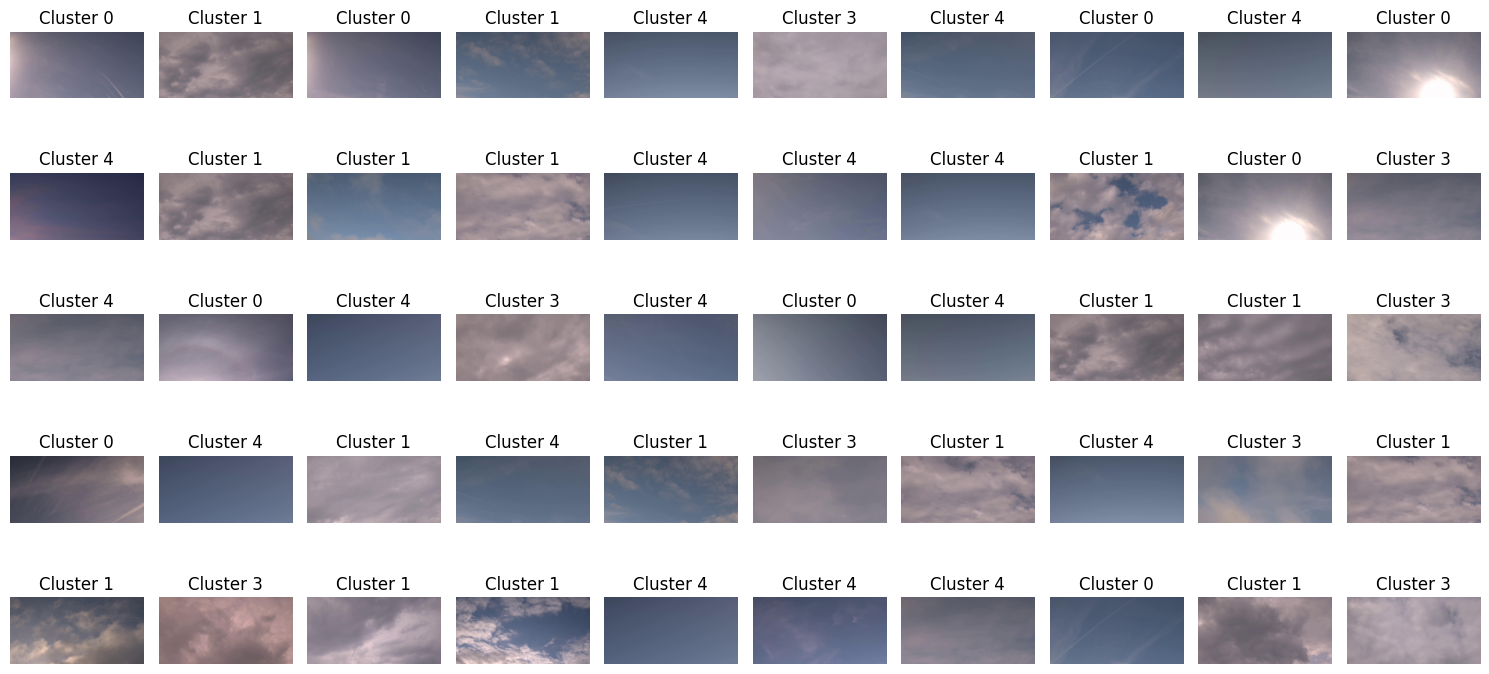

In [14]:
afficher_photos_aleatoires(photos_ciel_découpés, labels_kmeans_ciel, num_photos=50)

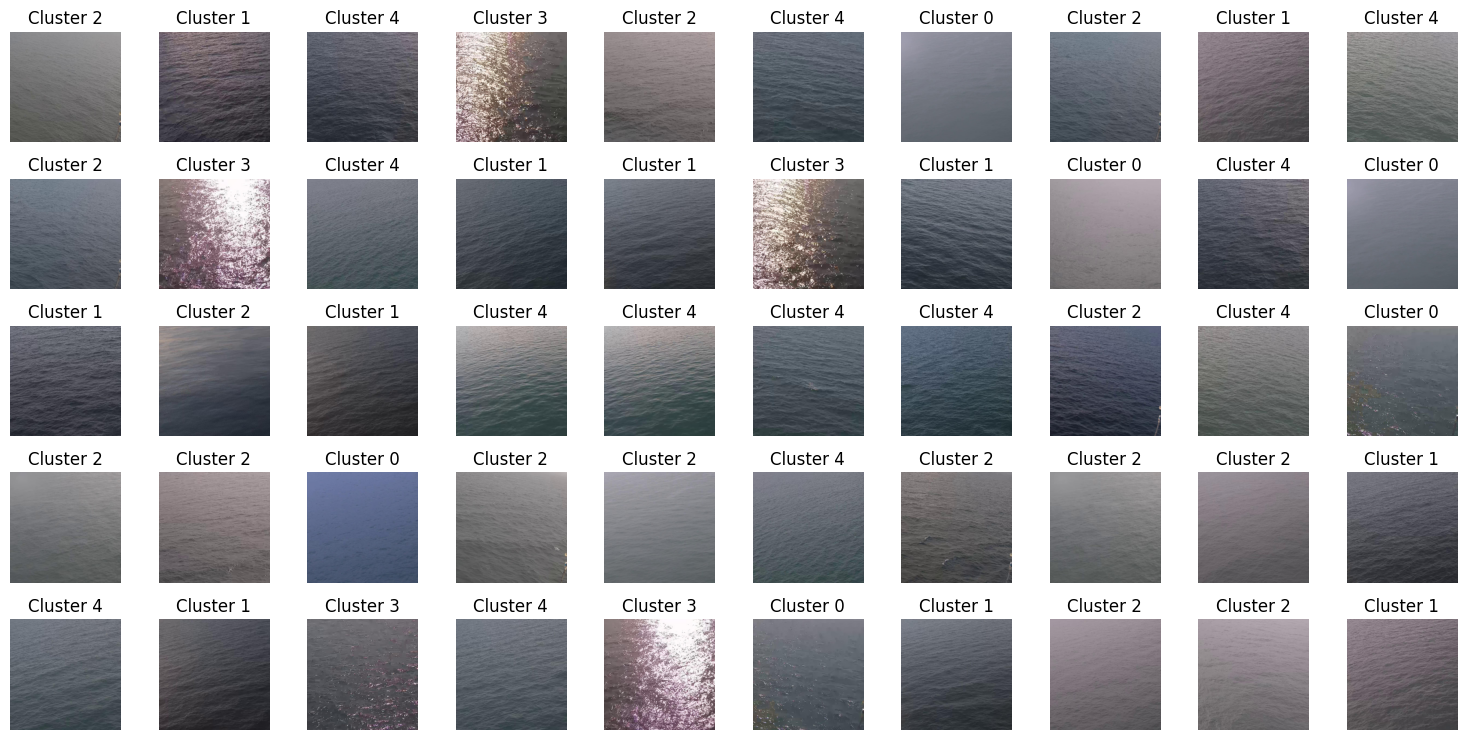

In [15]:
afficher_photos_aleatoires(photos_mer_découpés, labels_kmeans_mer, num_photos=50)

# Analyse des métriques

L'objectif est maintenant de pouvoir mesurer différentes grandeurs pour pouvoir distinguer et caractériser les clusters selon des paramètres météorologiques, on commence d'abord par les photos de ciel, plus révélatrices de la météo

Les différents paramètres qui vont être combinés sont la luminsoité, le flou, le contraste et le niveau de rouge. On calcule ces métriques avec la bilbiothèque OpenCV, qui est une bibliothèque utile pour extraire manuellement des features d'une image

Luminosité des clusters

In [16]:
cluster_luminosite_ciel = []
cluster_variance_luminosite_ciel = []

for cluster_id in range(k_optimal):
    # Liste des images par cluster
    cluster_images = [photos_ciel_découpés[i] for i in range(len(labels_kmeans_ciel)) if labels_kmeans_ciel[i] == cluster_id]
    
    # Liste de la luminosité moyenne de chaque image
    mean_luminosities = [np.mean(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)) for img in cluster_images]
    
    # Obtention de la luminosité moyenne et de la variance du cluster
    cluster_luminosite_ciel.append(np.mean(mean_luminosities))  # Moyenne
    cluster_variance_luminosite_ciel.append(np.var(mean_luminosities))  # Variance

# Affichage des valeurs de luminosité moyenne et variance
for i in range(k_optimal):
    print("Cluster", i, ":")
    print(" - Luminosité moyenne :", cluster_luminosite_ciel[i])
    print(" - Variance de la luminosité :", cluster_variance_luminosite_ciel[i])

Cluster 0 :
 - Luminosité moyenne : 115.62958304569361
 - Variance de la luminosité : 416.57185447042764
Cluster 1 :
 - Luminosité moyenne : 131.458642198871
 - Variance de la luminosité : 226.7867013492008
Cluster 2 :
 - Luminosité moyenne : 130.494184981685
 - Variance de la luminosité : 31.189379764714552
Cluster 3 :
 - Luminosité moyenne : 138.22464211358442
 - Variance de la luminosité : 258.45090419492124
Cluster 4 :
 - Luminosité moyenne : 98.21138115857167
 - Variance de la luminosité : 268.32694487051265


In [17]:
cluster_luminosite_mer = []
cluster_variance_luminosite_mer = []
for cluster_id in range(k_optimal):
    #Liste des images par clusters
    cluster_images = [photos_mer_découpés[i] for i in range(len(labels_kmeans_mer)) if labels_kmeans_mer[i] == cluster_id]
    #Liste de la luminosité moyenne de chaque image
    mean_luminosities = [np.mean(cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)) for img in cluster_images]
    #Obtention de la luminosité moyenne du cluster
    cluster_luminosite_mer.append(np.mean(mean_luminosities))
    cluster_variance_luminosite_mer.append(np.var(mean_luminosities))  # Variance

# Affichage des valeurs de luminosité moyenne
for i in range(k_optimal) : 
    print("Cluster", i, ":")
    print(" - Luminosité moyenne :", cluster_luminosite_mer[i])
    print(" - Variance de la luminosité :", cluster_variance_luminosite_mer[i])

Cluster 0 :
 - Luminosité moyenne : 117.31683893515765
 - Variance de la luminosité : 290.69395448107286
Cluster 1 :
 - Luminosité moyenne : 82.33392423434327
 - Variance de la luminosité : 72.13439960935212
Cluster 2 :
 - Luminosité moyenne : 107.31336276026174
 - Variance de la luminosité : 276.54610712256084
Cluster 3 :
 - Luminosité moyenne : 122.15985144424614
 - Variance de la luminosité : 671.2163838304554
Cluster 4 :
 - Luminosité moyenne : 94.47299698678323
 - Variance de la luminosité : 187.49560538457567


Flou des clusters

In [18]:
def calculer_flou(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

# Calculer le niveau de flou moyen pour chaque cluster
cluster_flou_ciel = []
cluster_flou_var_ciel = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_ciel_découpés[i] for i in range(len(labels_kmeans_ciel)) if labels_kmeans_ciel[i] == cluster_id]
    # Calculer le niveau de flou pour chaque image du cluster
    flous = [calculer_flou(img) for img in cluster_images]
    # Ajouter le niveau de flou moyen du cluster à la liste
    cluster_flou_ciel.append(np.mean(flous) if flous else 0)
    cluster_flou_var_ciel.append(np.var(flous) if flous else 0)

for i in range(k_optimal) : 
    print("Cluster", i, ":")
    print(" - Flou moyen  :", cluster_flou_ciel[i])
    print(" - Variance du flou :", cluster_flou_var_ciel[i])

Cluster 0 :
 - Flou moyen  : 0.7247710825828886
 - Variance du flou : 0.06584750822321303
Cluster 1 :
 - Flou moyen  : 1.5515410499930455
 - Variance du flou : 0.30250012968898843
Cluster 2 :
 - Flou moyen  : 1.9417226631016031
 - Variance du flou : 0.24514886163679295
Cluster 3 :
 - Flou moyen  : 1.1440707903460317
 - Variance du flou : 0.5719592230703273
Cluster 4 :
 - Flou moyen  : 0.3921486815130164
 - Variance du flou : 0.047019098517059245


In [19]:
def calculer_flou(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    laplacian_var = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return laplacian_var

# Calculer le niveau de flou moyen pour chaque cluster
cluster_flou_mer = []
cluster_flou_var_mer = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_mer_découpés[i] for i in range(len(labels_kmeans_mer)) if labels_kmeans_mer[i] == cluster_id]
    # Calculer le niveau de flou pour chaque image du cluster
    flous = [calculer_flou(img) for img in cluster_images]
    # Ajouter le niveau de flou moyen du cluster à la liste
    cluster_flou_mer.append(np.mean(flous) if flous else 0)
    cluster_flou_var_mer.append(np.var(flous) if flous else 0)

for i in range(k_optimal) : 
    print("Cluster", i, ":")
    print ("Niveau de flou moyen : ", cluster_flou_mer[i])
    print ("Variance du flou : ", cluster_flou_var_mer[i])

Cluster 0 :
Niveau de flou moyen :  249.54609884046133
Variance du flou :  159643.80437661288
Cluster 1 :
Niveau de flou moyen :  406.31856674242454
Variance du flou :  135620.545442266
Cluster 2 :
Niveau de flou moyen :  112.76628530786935
Variance du flou :  6741.799642223512
Cluster 3 :
Niveau de flou moyen :  2510.908208932318
Variance du flou :  551472.1830782067
Cluster 4 :
Niveau de flou moyen :  340.2718829257552
Variance du flou :  47241.91470292965


Contraste des clusters

In [20]:
def calculer_contraste(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    contrast = np.std(gray_image)  # Écart type des intensités
    return contrast

# Calculer le contraste moyen pour chaque cluster
cluster_contraste_ciel = []
cluster_contraste_var_ciel = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_ciel_découpés[i] for i in range(len(labels_kmeans_ciel)) if labels_kmeans_ciel[i] == cluster_id]
    # Calculer le contraste pour chaque image du cluster
    contrastes = [calculer_contraste(img) for img in cluster_images]
    # Ajouter le contraste moyen du cluster à la liste
    cluster_contraste_ciel.append(np.mean(contrastes) if contrastes else 0)
    cluster_contraste_var_ciel.append(np.var(contrastes) if contrastes else 0)

for i in range (k_optimal) : 
    print("Cluster", i, ":")
    print ("Niveau de contraste : ", cluster_contraste_ciel[i])
    print ("Variance du contraste : ", cluster_contraste_var_ciel[i])

Cluster 0 :
Niveau de contraste :  24.90075826218206
Variance du contraste :  87.26990427330426
Cluster 1 :
Niveau de contraste :  18.173917436521034
Variance du contraste :  54.85755740680057
Cluster 2 :
Niveau de contraste :  15.826788230586624
Variance du contraste :  6.596205188241312
Cluster 3 :
Niveau de contraste :  13.595128344599075
Variance du contraste :  33.853648053542905
Cluster 4 :
Niveau de contraste :  13.460792476062492
Variance du contraste :  7.943980487195278


In [21]:
def calculer_contraste(image):
    gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)
    contrast = np.std(gray_image)  # Écart type des intensités
    return contrast

# Calculer le contraste moyen pour chaque cluster
cluster_contraste_mer = []
cluster_contraste_var_mer = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_mer_découpés[i] for i in range(len(labels_kmeans_mer)) if labels_kmeans_mer[i] == cluster_id]
    # Calculer le contraste pour chaque image du cluster
    contrastes = [calculer_contraste(img) for img in cluster_images]
    # Ajouter le contraste moyen du cluster à la liste
    cluster_contraste_mer.append(np.mean(contrastes) if contrastes else 0)
    cluster_contraste_var_mer.append(np.var(contrastes) if contrastes else 0)

for i in range (k_optimal) : 
    print("Cluster", i, ":")
    print ("Niveau moyen de contraste : ", cluster_contraste_mer[i])
    print ("Variance moyen du contraste : ", cluster_contraste_var_mer[i])

Cluster 0 :
Niveau moyen de contraste :  16.72414347573891
Variance moyen du contraste :  7.362020414484903
Cluster 1 :
Niveau moyen de contraste :  24.632428169194476
Variance moyen du contraste :  20.331041403049248
Cluster 2 :
Niveau moyen de contraste :  20.430327050679367
Variance moyen du contraste :  9.167734747409272
Cluster 3 :
Niveau moyen de contraste :  50.782411106196015
Variance moyen du contraste :  336.9337612389313
Cluster 4 :
Niveau moyen de contraste :  23.466963512558674
Variance moyen du contraste :  48.420894441393074


Niveau de rouge des clusters

In [22]:
def calculer_niveau_rouge(image):
    red_channel = np.array(image)[:, :, 2]  # Extraire le canal rouge
    niveau_rouge = np.mean(red_channel)  # Moyenne des valeurs rouges
    return niveau_rouge

# Calculer le niveau moyen des rouges pour chaque cluster
cluster_rouge_ciel = []
cluster_rouge_var_ciel = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_ciel_découpés[i] for i in range(len(labels_kmeans_ciel)) if labels_kmeans_ciel[i] == cluster_id]
    # Calculer le niveau rouge pour chaque image du cluster
    niveaux_rouges = [calculer_niveau_rouge(img) for img in cluster_images]
    # Ajouter le niveau rouge moyen du cluster à la liste
    cluster_rouge_ciel.append(np.mean(niveaux_rouges) if niveaux_rouges else 0)
    cluster_rouge_var_ciel.append(np.var(niveaux_rouges) if niveaux_rouges else 0)

# Afficher le niveau moyen des rouges pour chaque cluster
for i in range(k_optimal):
    print("Cluster", i, ":")
    print("Niveau moyen des rouges :", cluster_rouge_ciel[i])
    print("Variance du niveau rouge :", cluster_rouge_var_ciel[i])

Cluster 0 :
Niveau moyen des rouges : 128.5240929076266
Variance du niveau rouge : 302.52267543649845
Cluster 1 :
Niveau moyen des rouges : 137.77845414201184
Variance du niveau rouge : 197.85692537740044
Cluster 2 :
Niveau moyen des rouges : 139.19636810838733
Variance du niveau rouge : 39.88328496338165
Cluster 3 :
Niveau moyen des rouges : 142.0100595238095
Variance du niveau rouge : 241.83515899356476
Cluster 4 :
Niveau moyen des rouges : 119.67905913564266
Variance du niveau rouge : 239.61068692340245


In [23]:
def calculer_niveau_rouge(image):
    red_channel = np.array(image)[:, :, 2]  # Extraire le canal rouge
    niveau_rouge = np.mean(red_channel)  # Moyenne des valeurs rouges
    return niveau_rouge

# Calculer le niveau moyen des rouges pour chaque cluster
cluster_rouge_mer = []
cluster_rouge_var_mer = []
for cluster_id in range(k_optimal):
    # Filtrer les images appartenant au cluster courant
    cluster_images = [photos_mer_découpés[i] for i in range(len(labels_kmeans_mer)) if labels_kmeans_mer[i] == cluster_id]
    # Calculer le niveau rouge pour chaque image du cluster
    niveaux_rouges = [calculer_niveau_rouge(img) for img in cluster_images]
    # Ajouter le niveau rouge moyen du cluster à la liste
    cluster_rouge_mer.append(np.mean(niveaux_rouges) if niveaux_rouges else 0)
    cluster_rouge_var_mer.append(np.var(niveaux_rouges) if niveaux_rouges else 0)

# Afficher le niveau moyen des rouges pour chaque cluster
for i in range(k_optimal):
    print("Cluster", i, ":")
    print("Niveau moyen des rouges :", cluster_rouge_mer[i])
    print("Variance du niveau rouge :", cluster_rouge_var_mer[i])

Cluster 0 :
Niveau moyen des rouges : 126.28980976105493
Variance du niveau rouge : 157.234703472108
Cluster 1 :
Niveau moyen des rouges : 89.34427244661428
Variance du niveau rouge : 75.15845479732874
Cluster 2 :
Niveau moyen des rouges : 110.48874479476503
Variance du niveau rouge : 244.25135642004017
Cluster 3 :
Niveau moyen des rouges : 122.0835656685835
Variance du niveau rouge : 585.1698783803429
Cluster 4 :
Niveau moyen des rouges : 103.2061751545405
Variance du niveau rouge : 94.90110776692786
